<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.Module

In [69]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리

import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet


import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")

# xgboost라이브러리 추가
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from datetime import datetime

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#1.Data

In [105]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")
df = df.sort_values('date')
df = df.rename(columns ={'date':'ds'})
df['ds']= pd.to_datetime(df['ds'])

df = df.set_index('ds')
df = df[df.index < '2019-04-01']
df = df.reset_index()
# df = df[['ds','Coal_price']]
df  

,ds,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
1,2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2,2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.97901,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
3,2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.98337,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
4,2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.99285,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2019-03-27,93.50,85.72,67.83,6336.00,59.41,59.12,37.47,690.0,1.40115,...,7194.200195,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000
3008,2019-03-28,92.95,85.64,67.82,6368.75,59.30,59.30,36.05,692.0,1.41153,...,7234.299805,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000
3009,2019-03-29,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609
3010,2019-03-30,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609


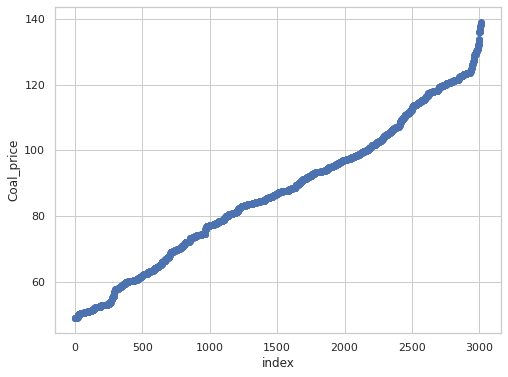

In [106]:
sns.set(rc={'figure.figsize':(14.7,6)})
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['Coal_price'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Coal_price', fontsize=12)
plt.show()

In [107]:
minmax = pd.DataFrame()

In [108]:
x = df.iloc[:,1]
x_MinMax = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax = pd.DataFrame(x_MinMax)
x = df.iloc[:,2]
x_MinMax1 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax1 = pd.DataFrame(x_MinMax1)
x = df.iloc[:,3]
x_MinMax2 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax2 = pd.DataFrame(x_MinMax2)
x = df.iloc[:,4]
x_MinMax3 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax3 = pd.DataFrame(x_MinMax3)
x = df.iloc[:,12]
x_MinMax4 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax4 = pd.DataFrame(x_MinMax4)
x = df.iloc[:,7]
x_MinMax5 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax5 = pd.DataFrame(x_MinMax5)
x = df.iloc[:,8]
x_MinMax6 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax6 = pd.DataFrame(x_MinMax6)
x = df.iloc[:,9]
x_MinMax7 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax7 = pd.DataFrame(x_MinMax7)

# 출처: https://carriedata.tistory.com/entry/파이썬-01-스케일링-최소-최대-MinMaxScaler [캐리의 데이터 세상:티스토리]

In [109]:
x = df.iloc[:,12]
x

0       79.288002
1       79.288002
2       79.384003
3       79.698997
4       80.538002
          ...    
3007    96.282997
3008    96.764000
3009    96.845001
3010    96.845001
3011    96.845001
Name: US 달러지수, Length: 3012, dtype: float64

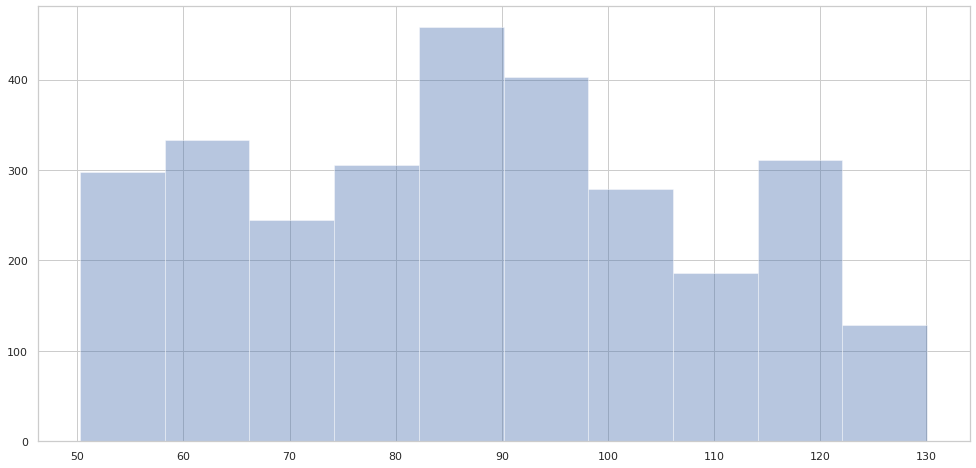

In [110]:
sns.set(rc={'figure.figsize':(16.7,8)})
sns.set_style("whitegrid")
llimit = np.percentile(df.Coal_price.values, 1)
ulimit = np.percentile(df.Coal_price.values, 99)
df_plot = df[df['Coal_price'] > llimit]
df_plot = df_plot[df_plot['Coal_price'] < ulimit]
sns.distplot(df_plot.Coal_price.values, bins=10, kde=False);

In [111]:
x_MinMax = pd.DataFrame(x_MinMax)
x_MinMax

,Coal_price
0,0.818283
1,0.818283
2,0.971745
3,0.980609
4,0.906925
...,...
3007,0.495291
3008,0.489197
3009,0.486981
3010,0.486981


No handles with labels found to put in legend.


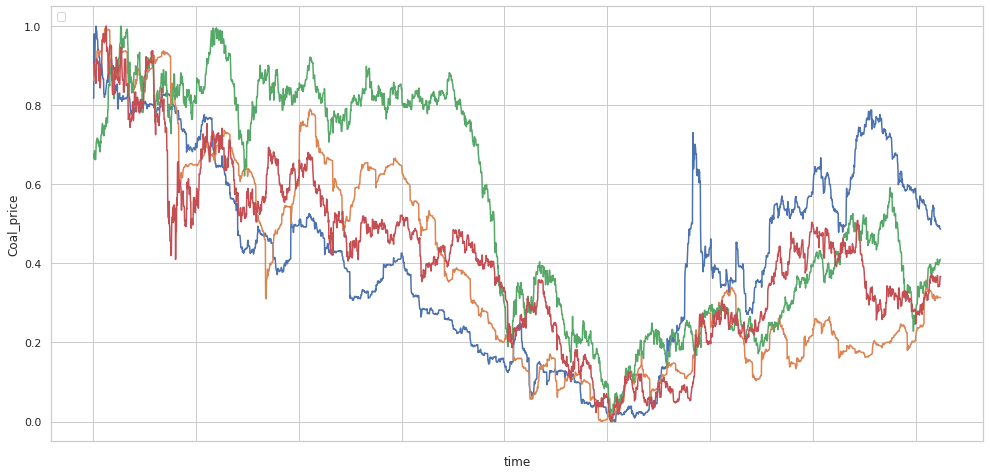

In [112]:
sns.set_style("whitegrid")
ax = sns.lineplot(data = x_MinMax, x = df['ds'], y = 'Coal_price');
ax = sns.lineplot(data = x_MinMax1, x = df['ds'], y = 'iron');
ax = sns.lineplot(data = x_MinMax2, x = df['ds'], y = 'Brent_fut');
ax = sns.lineplot(data = x_MinMax3, x = df['ds'], y = 'copper_fut');
# ax1 = sns.lineplot(data = x_MinMax4, x = df['ds'], y = 'WTI_fut');
# ax1 = sns.lineplot(data = x_MinMax5, x = df['ds'], y = 'LNG_fut');
# ax1 = sns.lineplot(data = x_MinMax6, x = df['ds'], y = 'bdi');
# ax1 = sns.lineplot(data = x_MinMax7, x = df['ds'], y = 'USD/AUD(호주)');
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.legend(loc='upper left')
plt.xlabel("time");
plt.show()

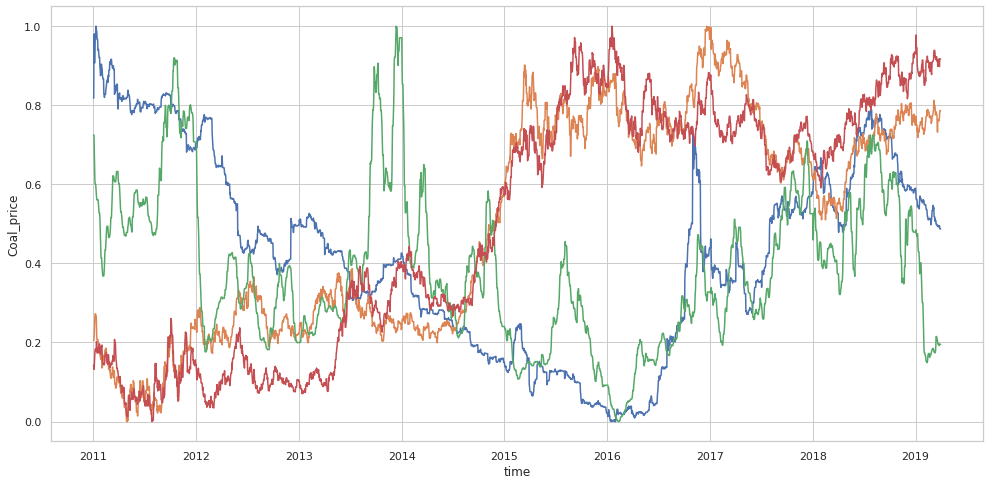

In [113]:
sns.set_style("whitegrid")
ax = sns.lineplot(data = x_MinMax, x = df['ds'], y = 'Coal_price');
ax1 = sns.lineplot(data = x_MinMax4, x = df['ds'], y = 'US 달러지수');

ax2 = sns.lineplot(data = x_MinMax6, x = df['ds'], y = 'bdi');
ax3 = sns.lineplot(data = x_MinMax7, x = df['ds'], y = 'USD/AUD(호주)');
plt.xlabel("time");
plt.show()

In [114]:
def getadvance(x):
    ret = 0
    if x > 0:
        ret = 1
    return(ret)
def get_month(dt):
    x = dt.strftime("%m")
    return(x)

In [115]:
df['Coal_price'].shift(-1)

0       122.65
1       136.50
2       137.30
3       130.65
4       133.15
         ...  
3007     92.95
3008     92.75
3009     92.75
3010     92.75
3011       NaN
Name: Coal_price, Length: 3012, dtype: float64

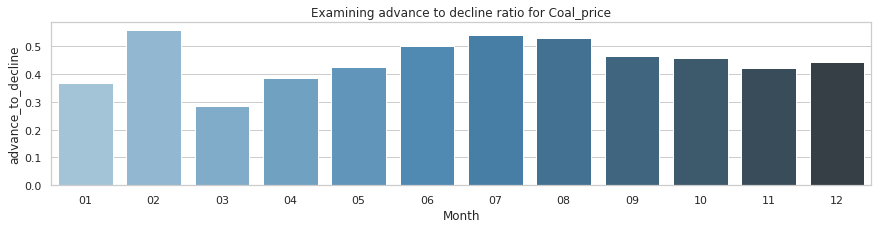

In [116]:



sns.set(rc={'figure.figsize':(14.7,3)})
sns.set_style("whitegrid")
df = df.sort_values(by = "ds", ascending = False)
df['pCoal_price'] = df['Coal_price'].shift(-1)
df['delta'] = df['Coal_price'] - df['pCoal_price']
df['advance'] = list(map(getadvance, df['delta']))
df['Date'] = pd.to_datetime(df['ds'], format = "%Y-%m-%d")
df['Month'] =  list(map(get_month, df['ds']))
df_stats = df.groupby(["Month"]).agg(
                    advances = ("advance", "sum"), total = ("advance",  "count")).reset_index()
df_stats['advance_to_decline'] = df_stats['advances'] / (df_stats['total'] - df_stats['advances'])
plt.title("Examining advance to decline ratio for Coal_price")
ax  = sns.barplot(x="Month", y="advance_to_decline", data=df_stats, palette="Blues_d")
plt.show()

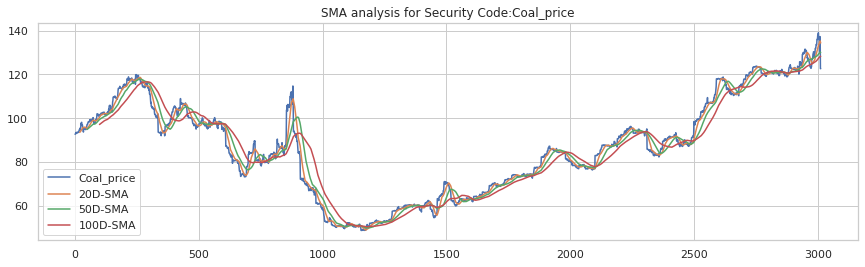

In [117]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14.7,4)})
sns.set_style("whitegrid")
df_s = df[['ds', 'Coal_price']].reset_index(drop = True)
df_s['20D-SMA'] = df_s['Coal_price'].rolling(window=20).mean()
df_s['50D-SMA'] = df_s['Coal_price'].rolling(window=50).mean()
df_s['100D-SMA'] = df_s['Coal_price'].rolling(window=100).mean()
df_s.set_index('ds')
del df_s['ds']
df_s.plot(title = "SMA analysis for Security Code:" + 'Coal_price');

In [118]:
def ma_plot(a) :
    sns.set(rc={'figure.figsize':(14.7,4)})
    sns.set_style("whitegrid")
    df_s = df[['ds', a]].reset_index(drop = True)
    df_s['20D-SMA'] = df_s[a].rolling(window=20).mean()
    df_s['50D-SMA'] = df_s[a].rolling(window=50).mean()
    df_s['100D-SMA'] = df_s[a].rolling(window=100).mean()
    df_s.set_index('ds')
    del df_s['ds']
    df_s.plot(title = "SMA analysis for Security Code:" + str(a));

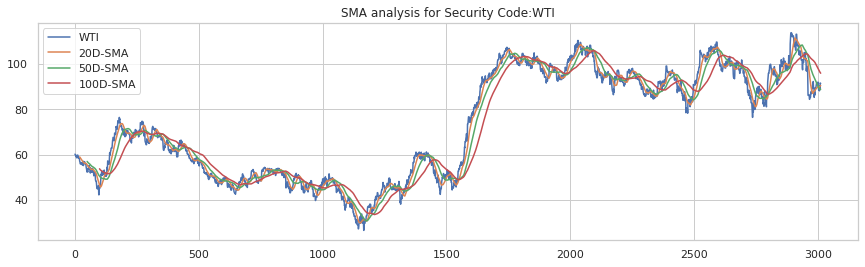

In [119]:
ma_plot('WTI')

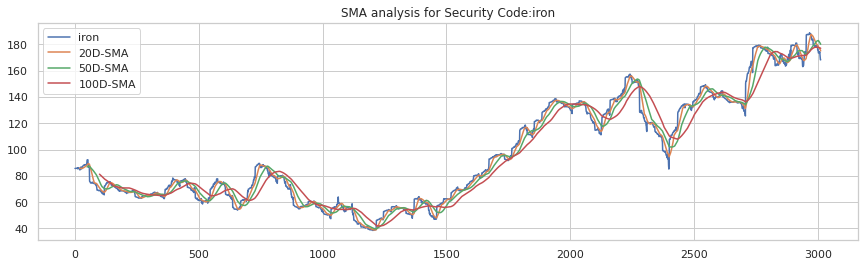

In [120]:
ma_plot('iron')

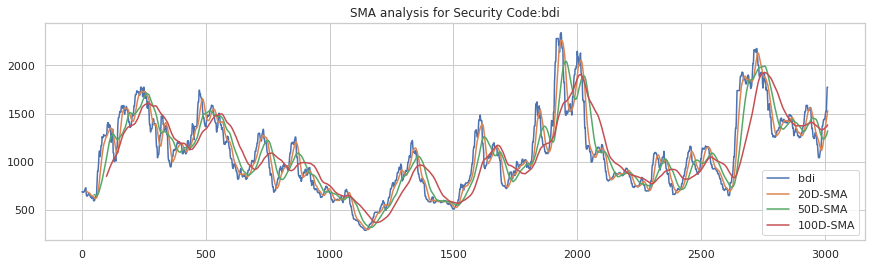

In [121]:
ma_plot('bdi')

In [ ]:
# df_coal = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.csv", encoding = 'utf-8-sig')
# df_coal = df_coal.sort_values('date')
# df_coal['date']= pd.to_datetime(df_coal['date'])

# df_coal = df_coal.set_index('date')
# df_coal = df_coal[df_coal.index < '2019-04-01']
# df_coal = df_coal[df_coal.index >= '2019-01-01']
# df_coal = df_coal.reset_index()
# df_coal = df_coal[['date','Coal_price']]
# df_coal